# Drug Labels Extraction with OCR

## Referneces:
https://github.com/PaddlePaddle/PaddleOCR

https://www.youtube.com/watch?v=t5xwQguk9XU

https://github.com/nicknochnack/DrugLabelExtraction-/blob/main/Paddle%20OCR%20Tutorial.ipynb


# 1. Install and Import Dependencies

In [1]:
# GitHub repo installation of paddle
!python -m pip install paddlepaddle-gpu==2.0.0 -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 689.6 MB 12 kB/s 
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires gast==0.4.0, but you have gast 0.3.3 which is incompatible.


In [2]:
# Install paddle OCR
!pip install paddleocr

     |████████████████████████████████| 236 kB 7.0 MB/s 
     |████████████████████████████████| 2.7 MB 51.0 MB/s 
     |████████████████████████████████| 55.7 MB 15 kB/s 
     |████████████████████████████████| 12.5 MB 20.9 MB/s 
     |████████████████████████████████| 948 kB 62.8 MB/s 
     |████████████████████████████████| 123 kB 76.4 MB/s 
     |████████████████████████████████| 50 kB 8.0 MB/s 
     |████████████████████████████████| 404 kB 59.9 MB/s 
     |████████████████████████████████| 73 kB 2.2 MB/s 
     |████████████████████████████████| 197 kB 74.7 MB/s 
     |████████████████████████████████| 2.0 MB 56.5 MB/s 
     |████████████████████████████████| 191 kB 72.2 MB/s 
     |████████████████████████████████| 68 kB 8.6 MB/s 
     |████████████████████████████████| 41 kB 832 kB/s 
     |████████████████████████████████| 1.9 MB 56.9 MB/s 
     |████████████████████████████████| 5.3 MB 56.5 MB/s 
     |████████████████████████████████| 636 kB 61.0 MB/s 
     |█████████████████

In [3]:
# Clone paddle OCR repo - get FONTS for visualization
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 20501, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 20501 (delta 44), reused 55 (delta 29), pack-reused 20404
Receiving objects: 100% (20501/20501), 135.57 MiB | 36.16 MiB/s, done.
Resolving deltas: 100% (13784/13784), done.


In [4]:
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import cv2 #opencv
import os # folder directory navigation

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 2. Instantiate Model and Detect

In [8]:
# load model
ocr_model = PaddleOCR(lang = 'en')

download https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/en_ppocr_mobile_v2.0_det_infer.tar to /root/.paddleocr/2.2.0.2/ocr/det/en/en_ppocr_mobile_v2.0_det_infer/en_ppocr_mobile_v2.0_det_infer.tar


100%|██████████| 3.16M/3.16M [00:02<00:00, 1.40MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/en_number_mobile_v2.0_rec_infer.tar to /root/.paddleocr/2.2.0.2/ocr/rec/en/en_number_mobile_v2.0_rec_infer/en_number_mobile_v2.0_rec_infer.tar


100%|██████████| 2.70M/2.70M [00:09<00:00, 297kiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/2.2.0.2/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 1.45M/1.45M [00:03<00:00, 381kiB/s]


Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/2.2.0.2/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/2.2.0.2/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_polygon=True, e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set='totaltext', enable_mkldnn=False, gpu_mem=500, help='==SUPPRESS==', image_dir=None, ir_optim=True, label_list=['0', '180'], lang='en', layout_path_model='l

In [13]:
# read image path similar to project directory
img_path = '/content/gdrive/MyDrive/Projects/Drug-Label-Extraction/drug1.jpg'

In [14]:
# extract from the image
result = ocr_model.ocr(img_path)

[2021/08/23 20:59:54] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2021/08/23 21:00:03] root DEBUG: dt_boxes num : 6, elapse : 9.417516469955444
[2021/08/23 21:00:04] root DEBUG: rec_res num  : 6, elapse : 0.01648736000061035


In [15]:
result

[[[[220.0, 198.0], [288.0, 201.0], [288.0, 215.0], [219.0, 213.0]],
  ('50MCG TABLETS', 0.9183024)],
 [[[218.0, 218.0], [335.0, 215.0], [336.0, 232.0], [219.0, 235.0]],
  ('TAKE ONE TABLETBL', 0.9577547)],
 [[[219.0, 232.0], [284.0, 235.0], [283.0, 250.0], [218.0, 246.0]],
  ('EVErY DAY', 0.8854159)],
 [[[219.0, 256.0], [253.0, 259.0], [252.0, 274.0], [218.0, 272.0]],
  ('QTY:90', 0.9380066)],
 [[[217.0, 275.0], [331.0, 272.0], [332.0, 289.0], [218.0, 293.0]],
  ('MAY REFILL 4X BY12-012', 0.9206018)],
 [[[221.0, 289.0], [293.0, 292.0], [293.0, 306.0], [220.0, 304.0]],
  ('12012019', 0.990263)]]

In [16]:
# loop through results array and print the extracted text
for res in result:
  print(res[1][0])

50MCG TABLETS
TAKE ONE TABLETBL
EVErY DAY
QTY:90
MAY REFILL 4X BY12-012
12012019



# 3. Visualise Results

In [24]:
# extract and assign each variable in the array into a variable

# bounding boxes that will be drawn around the text
boxes = [res[0] for res in result]
# extracted text
texts = [res[1][0] for res in result]
# scores of the extracted text
scores = [res[1][1] for res in result]

In [21]:
# path to fonts folder in PaddleOCR dir
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [22]:
# read image with opencv
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

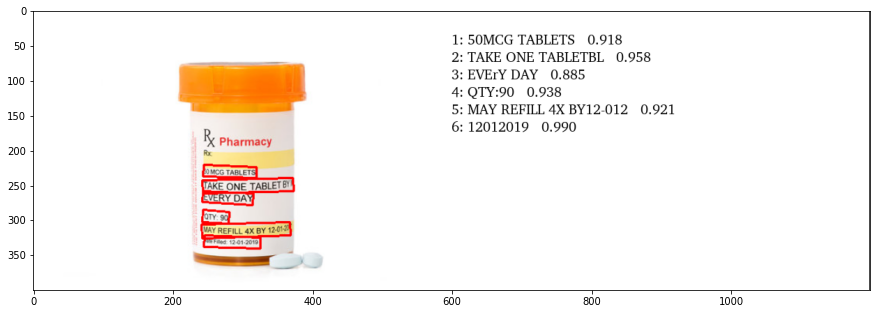

In [26]:
# vsiaulize image and detections

# figure size
plt.figure(figsize = (15, 15))
# draw annotations
annotated = draw_ocr(img, boxes, texts, scores, font_path = font_path)
# show the figure
plt.imshow(annotated)